In [4]:
# importaremos las bibliotecas utilizadas para el aprendizaje automático
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Se usa para trazar el grafico 
import seaborn as sns # utilizado para trazar gráfico interactivo
%matplotlib inline
from sklearn.linear_model import LogisticRegression # para usar el modelo de regresión
from sklearn.model_selection import train_test_split # para dividir los datos en entrenamieto y pruebas
from sklearn.model_selection import GridSearchCV# parametro de ajuste
from sklearn.ensemble import RandomForestClassifier # para genrear modelo de clasificación
from sklearn.naive_bayes import GaussianNB # para genrear modelo de GaussianNB
from sklearn.neighbors import KNeighborsClassifier # para genrear modelo de KNN
from sklearn.tree import DecisionTreeClassifier # para genrear modelo de decisión
from sklearn import svm # vectores de soporte
from sklearn import metrics # comprobar el error y precision del modelo
from sklearn.preprocessing import StandardScaler #estándariza los datos
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix#mattriz de confusión
from sklearn.svm import SVC # vectores de soporte
from sklearn.decomposition import PCA
from dtreeviz.trees import dtreeviz # visualizar arbolde nos ayuda a la grafica
from xgboost import XGBClassifier # para genrear modelo XGBClassifier
from sklearn.metrics import classification_report

In [5]:
pingui = pd.read_csv("C:\\Users\\davalos\\Dropbox\\Davalos\\Documents\\Danny Documentos\\UIDE\Materias\\3-Aprendizaje Automatico\\Semana 2\\TArea Foro\\penguins.csv")
#veamos que tiene el dataset
pingui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
pingui.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
pingui.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [8]:
df_pingui=pingui.fillna(method='bfill')

In [9]:
df_pingui

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
df_pingui.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
df_pingui.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
print(df_pingui.head(2))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  


In [13]:
df_pingui.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
df_pingui['species'].value_counts()



Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [15]:
df_pingui['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [16]:
df_pingui['sex'] = df_pingui['sex'].apply(lambda x: 1 if x == 'MALE' else 0)

In [17]:
#columna sex  el valor Male = 1 y Female = 0
df_pingui['species']=df_pingui['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})


In [18]:
#columna sex  el valor Male = 1 y Female = 0
df_pingui['island']=df_pingui['island'].map({'Biscoe':0,'Dream':1,'Torgersen':2})

In [19]:
df_pingui['species'].value_counts()

0    152
1    124
2     68
Name: species, dtype: int64

In [20]:
df_pingui

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...,...
339,1,0,46.8,14.3,215.0,4850.0,0
340,1,0,46.8,14.3,215.0,4850.0,0
341,1,0,50.4,15.7,222.0,5750.0,1
342,1,0,45.2,14.8,212.0,5200.0,0


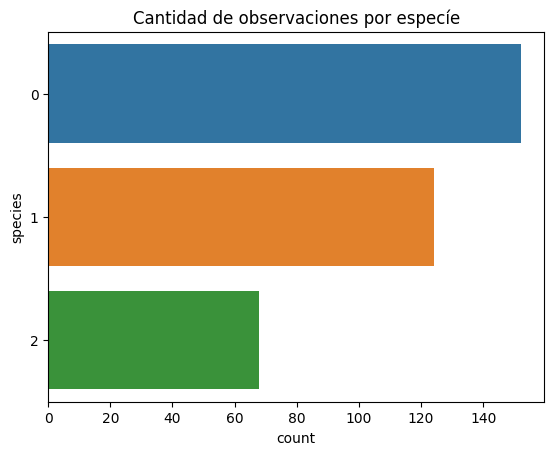

In [21]:
ax = sns.countplot(y = "species", data = df_pingui)
ax.set_title("Cantidad de observaciones por especíe");

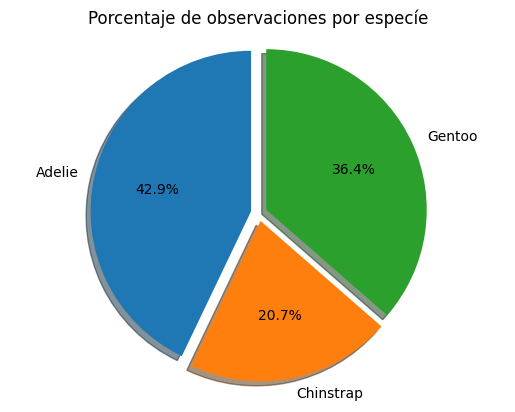

In [22]:
labels = 'Adelie', 'Chinstrap', 'Gentoo'
sizes = [139, 67, 118]
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Porcentaje de observaciones por especíe");
plt.show()

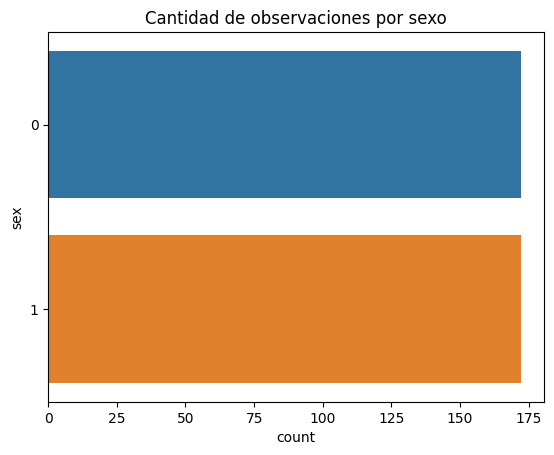

In [23]:
ax = sns.countplot(y = "sex", data = df_pingui)
ax.set_title("Cantidad de observaciones por sexo");

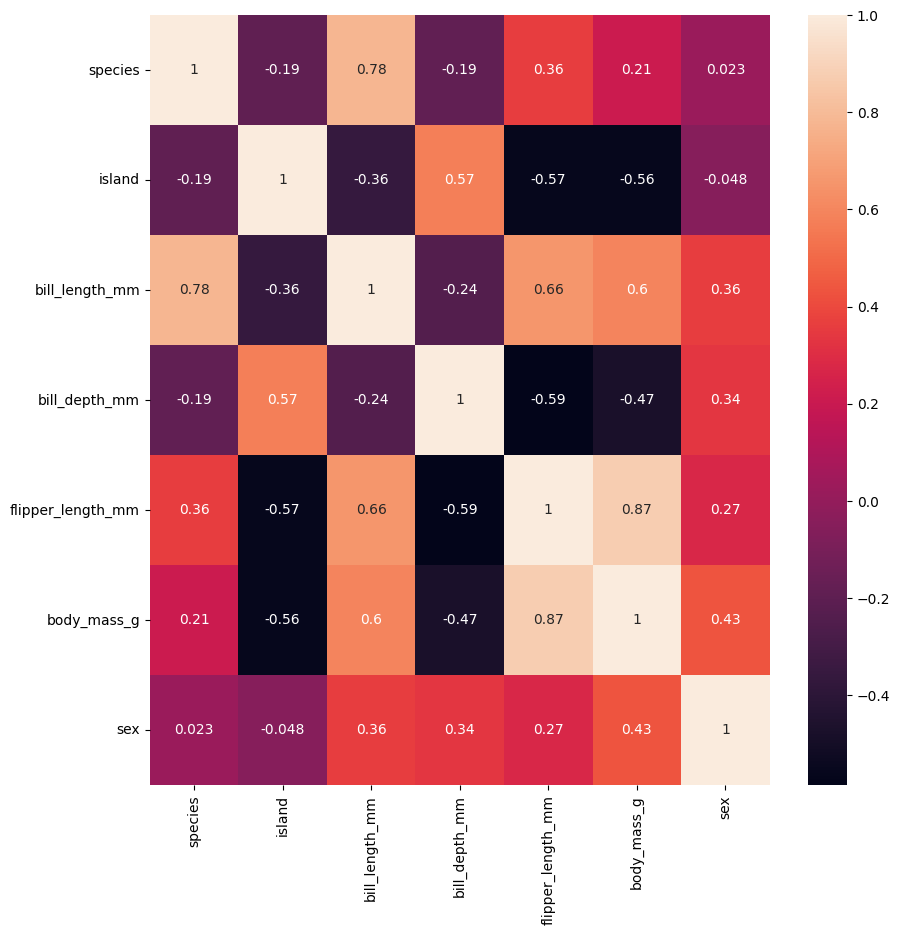

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df_pingui.corr(), annot = True)
plt.show()

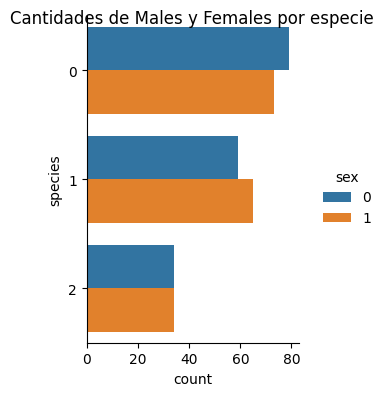

In [25]:
ax = sns.catplot(y="species", hue="sex", data = df_pingui, kind = "count", height=4, aspect=.7)
ax.fig.suptitle("Cantidades de Males y Females por especie");

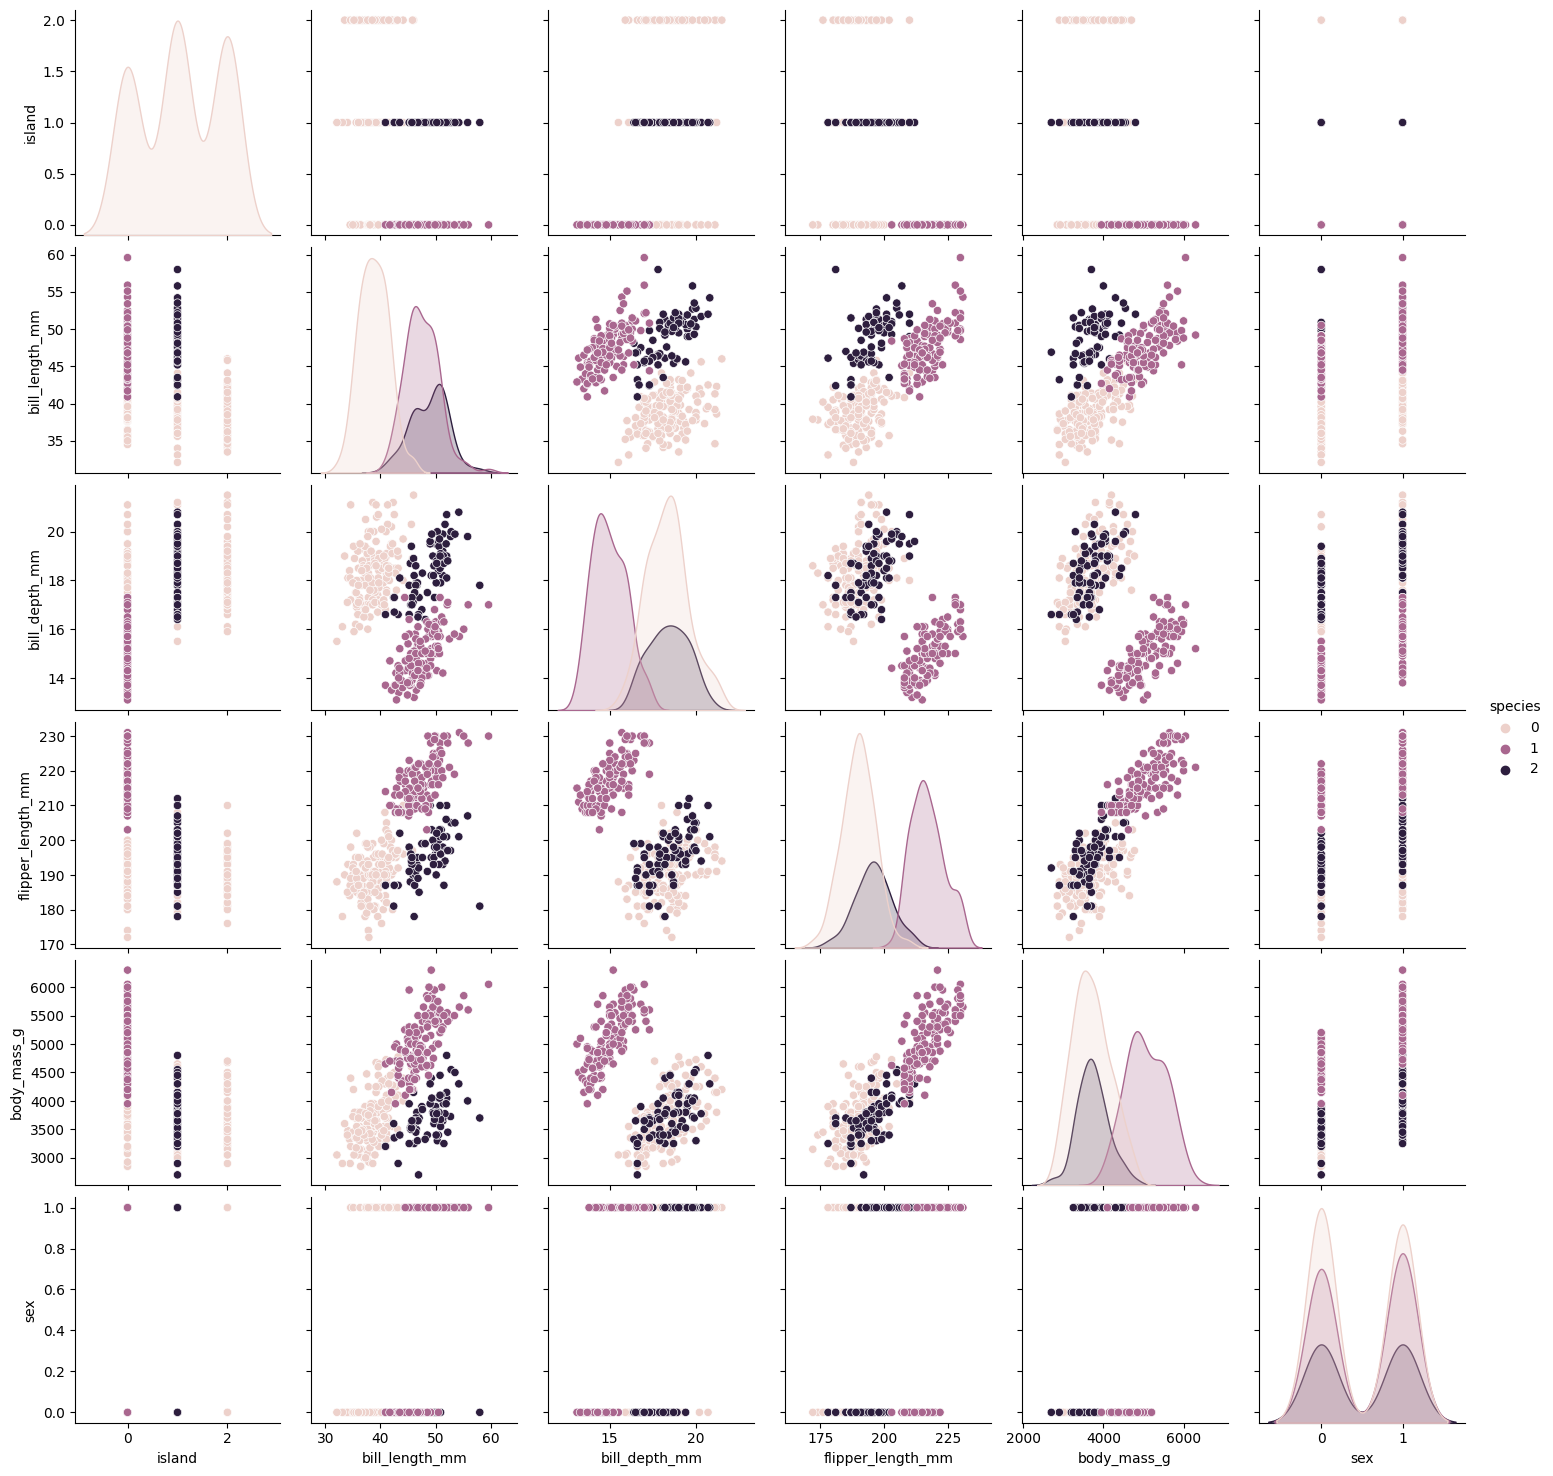

In [26]:
sns.pairplot(df_pingui, hue = "species")

In [27]:
y = df_pingui['species'] #Variable objetivo 
X = df_pingui.drop(['species'], axis = 1) ### caracteristicas de entrada
y.head(3)

0    0
1    0
2    0
Name: species, dtype: int64

In [28]:
y.value_counts()

0    152
1    124
2     68
Name: species, dtype: int64

In [29]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
3,2,36.7,19.3,193.0,3450.0,0
4,2,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...,...
339,0,46.8,14.3,215.0,4850.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [31]:
#Modelo de Regresión
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
accu_reg = accuracy_score(y_test, Y_pred_log)
print("Exactitud de modelo de Regression:", accu_reg*100)

Exactitud de modelo de Regression: 98.55072463768117


C:\Users\davalos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


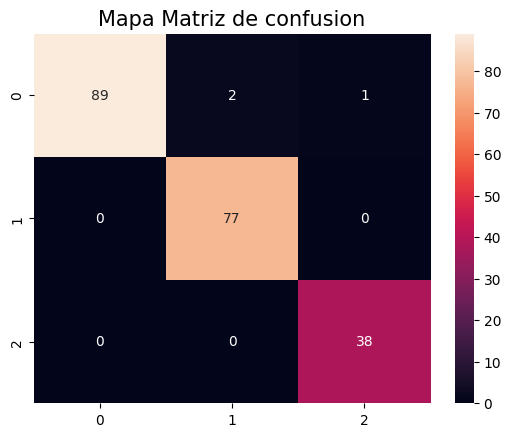

In [32]:
cm = confusion_matrix(y_test, Y_pred_log)
plt.title('Mapa Matriz de confusion', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [33]:
#Vestores de soporte
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
accu_svc = accuracy_score(y_test, Y_pred_svm)
print("Precisión utilizando la máquina de vectores de soporte:", accu_svc*100)

Precisión utilizando la máquina de vectores de soporte: 73.42995169082126


In [34]:
#Modelo de knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = svc.predict(X_test)
accu_knn = accuracy_score(y_test, Y_pred_knn)
print("Precisión utilizando modelo KNN:", accu_knn*100)

Precisión utilizando modelo KNN: 73.42995169082126


In [35]:
#Modelo de random_forest
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, Y_pred_dt)
print("Precisión utilizando modelo Decision Tree:", acc_decision_tree*100)

Precisión utilizando modelo Decision Tree: 96.1352657004831


In [36]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="species",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

In [37]:
pca = PCA(n_components=3)

In [38]:
pca.fit(X_train)

PCA(n_components=3)

3


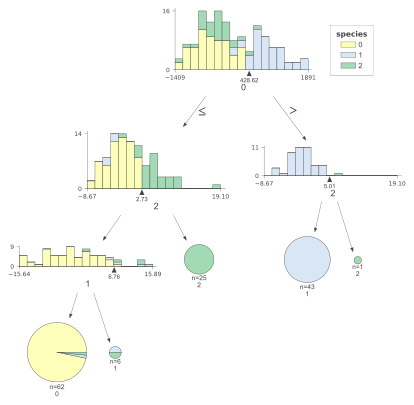

In [39]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(pca.transform(X_train), y_train)
print(decision_tree.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, decision_tree)
viz

In [40]:
# Modelo de random_forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, Y_pred_rf)
print("Precisión de modelo Random Forest:", acc_random_forest*100)

Precisión de modelo Random Forest: 98.06763285024155


In [41]:
# Modelo de XGBoost 
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Precisión de modelo XGBoost Classifier:", acc_xgb*100)

Precisión de modelo XGBoost Classifier: 98.06763285024155


In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree',
              'Random Forest', 'XG Boost'],
    'Score': [accu_svc, accu_knn, accu_reg, acc_decision_tree,
              acc_random_forest, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.985507
4,Random Forest,0.980676
5,XG Boost,0.980676
3,Decision Tree,0.961353
0,Support Vector Machines,0.734300
1,KNN,0.734300
